In [1]:
import numpy as np
import asset_calculations
import bond_calculations

In [2]:
nominal = 100
coupon = 0.0212
ytm = 0.0209
maturity = 5
freq = 2

In [3]:
price = bond_calculations.bond_price(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)
price

100.14172722821947

In [4]:
bond_calculations.bond_duration(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)

(4.770684632926131, 4.72134656135992)

In [5]:
bond_calculations.bond_convexity(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)

25.300711889220022

In [6]:
bond_calculations.bond_ytm(nominal=nominal, market_price=price, coupon=coupon, maturity=maturity)

0.020901733819564932

---
## taylor series approximation

$$\frac{ΔP}{P} = -D \cdot \Delta y + \frac{1}{2} \cdot C \cdot (y^2)$$


In [27]:
yield_changes = np.arange(-0.4, 0.4, 0.1)

duration = bond_calculations.bond_duration(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)[1]
conv = bond_calculations.bond_convexity(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)

ll = []

for i in yield_changes:
    one = -duration * i
    two = (1/2 * conv * (i ** 2) / 100)
    three = (one + two)
    four = three / 100 + 1
    
    ll.append(four * price)

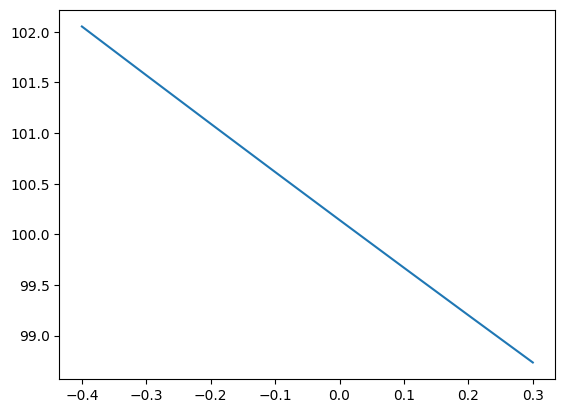

In [28]:
import matplotlib.pyplot as plt

plt.plot(yield_changes, ll)